# Data analysis, preparing and prediction by linear regression model




In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt

## Importing dataset

In [2]:
train_path='train.csv'
test_path='test.csv'
df_train=pd.read_csv(train_path)
df_test=pd.read_csv(test_path)
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

Data contains a lot of categorical features. I need to transform it into numeric to use in regression model

In [5]:
df_train.isna().sum().sum()

6965

Data contains lots of NaN values. Data description show us that this values means this hous has no this type of construction/parameter


## Data transformation

At first I merge train and test dataset to make all trasformation for both sets at once.

Marking test and train data and merging it.


In [6]:
df_train['IsTest']=0
df_test['IsTest']=1
df=pd.concat([df_train,df_test])
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsTest
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,0


In [7]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsTest
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,1
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN,1
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN,1
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN,1
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN,1


### Missing data

In [8]:
nan_data = (df.isnull().sum() / len(df)) * 100
nan_data = nan_data.drop(nan_data[nan_data == 0].index).sort_values(ascending=False)[:30]
missed_data = pd.DataFrame({'% of nan' :nan_data})
missed_data.head(20)

,% of nan
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
SalePrice,49.982871
FireplaceQu,48.646797
LotFrontage,16.649538
GarageCond,5.447071
GarageYrBlt,5.447071
GarageFinish,5.447071


From [description of data](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) we now that NaN values means:

* PoolQC -No Pool
* MiscFeature - No Features
* Alley -No alley access
* Fence - No Fence
* etc.

All of those missed types I can replace by Zeros, because I are going to mark categorical data as numerical The exception is 'LotFrontage', but it I will seth as Zero too.

In [9]:
df.fillna(0,inplace=True)
obj = df.dtypes[df_train.dtypes=='object'].sort_values(ascending=False).index
for i in obj:
    df[i]=pd.factorize(df[i])[0]

Spliting train and test sets

In [10]:
df_train=df.query("IsTest == 0")
df_train=df_train.drop(columns=['IsTest'])
df_train.shape

(1460, 81)

In [11]:
df_test=df.query("IsTest == 1")
df_test=df_test.drop(columns=['IsTest', 'SalePrice'])
df_test.shape

(1459, 80)

## Data exploration

### Sales price distribution

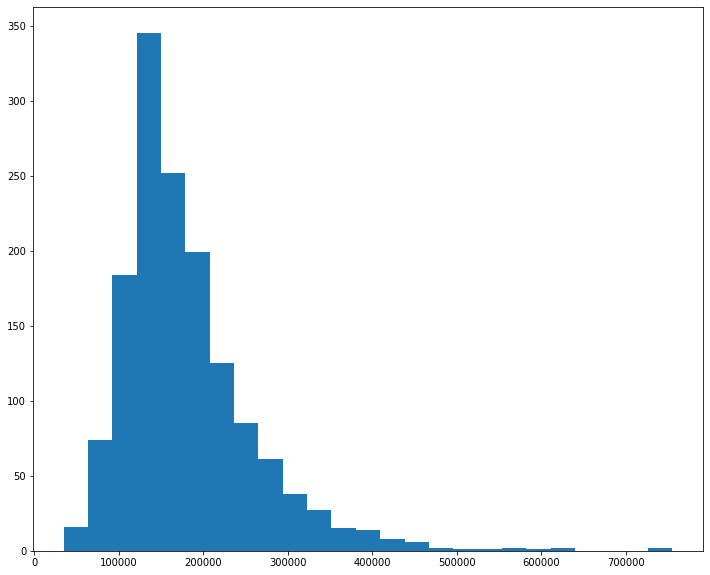

In [12]:
plt.figure(figsize=(12, 10))
plt.hist(df_train['SalePrice'], bins=25);

Distribution is not normal and right-shifted

## Observation of main features

Choosing featurs with correlation level more than 30%

In [13]:
corr_feat = df_train.corr()[df_train.corr()['SalePrice'] > 0.3]['SalePrice'].sort_values(ascending=False).index
print(corr_feat)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'FireplaceQu', 'BsmtFinSF1',
       'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF'],
      dtype='object')


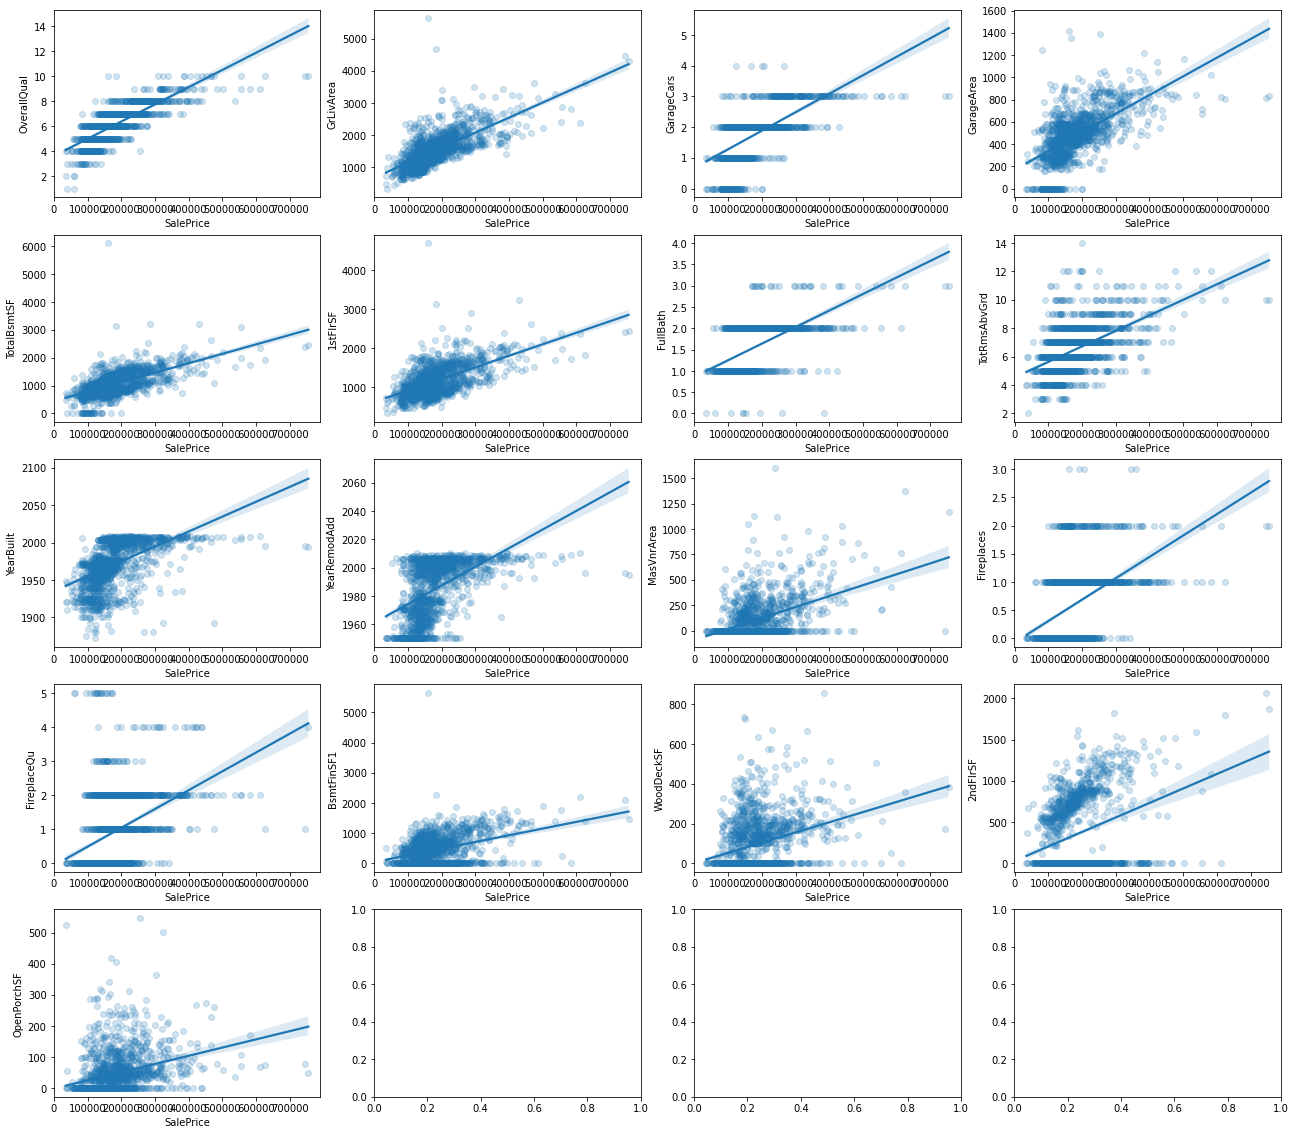

In [14]:
corr_feat=[ 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'FireplaceQu', 'BsmtFinSF1',
       'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF']                    
K=0
t=0
f, axes = plt.subplots(5, 4, figsize=(22,20))
for i in corr_feat:
    if K<4:
        sns.regplot(ax=axes[t, K], data=df_train, x='SalePrice', y=i, scatter_kws={'alpha':0.2})
        K+=1
        
    else:        
        K=0
        t+=1
        sns.regplot(ax=axes[t, K], data=df_train, x='SalePrice', y=i, scatter_kws={'alpha':0.2})
        K+=1
        

As we see most types of correlation is linear, and our transformed data fits well enough main trends.

### Correlation matrix for top features

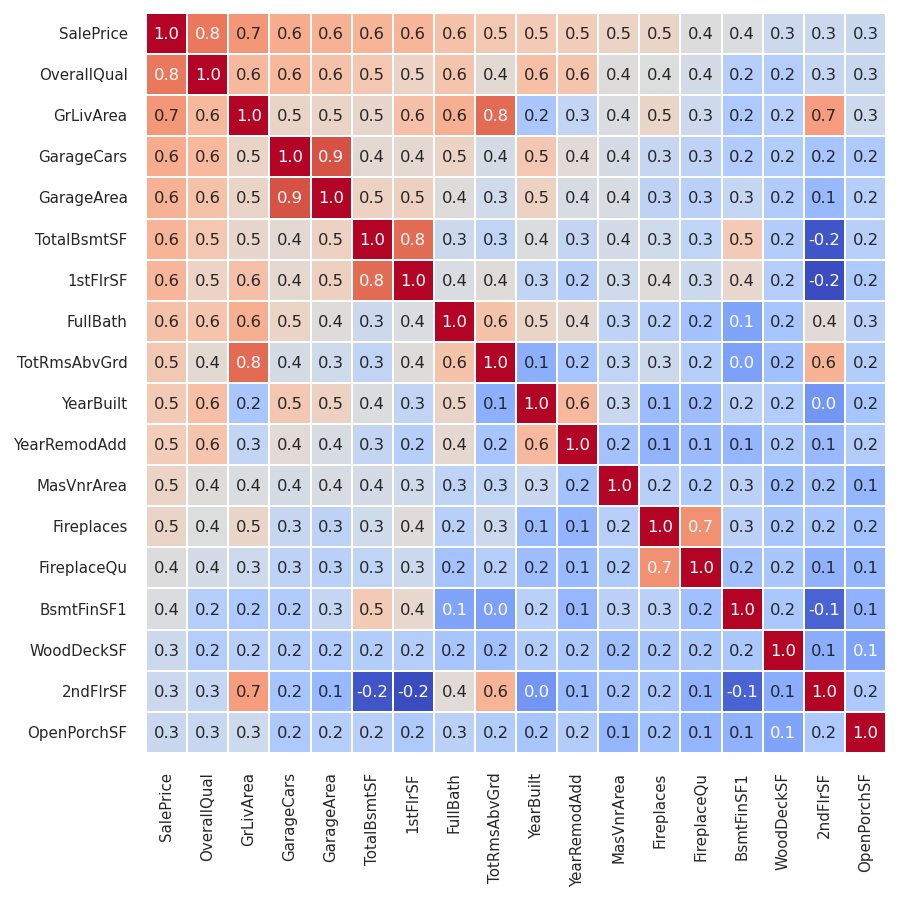

In [15]:
corrmat = df_train[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'FireplaceQu', 'BsmtFinSF1',
       'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF']].corr()
sns.set(font_scale=0.7)
plt.figure(figsize=(7, 7), dpi=140)
sns.heatmap(corrmat, annot=True, fmt='.1f', cmap='coolwarm',  square=True, linewidths=1, cbar=False)
plt.show()

# Modeling

## Choosing best model

### Set preparation 


In [16]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

#### Data normalisation and train/test spliting

In [17]:
df_max_scaled=df_train.drop(columns=['SalePrice', 'Id']).copy()
for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()

X=np.array(df_max_scaled)
Y=np.array(df_train['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)
X_train.shape

(1095, 79)

### Lasso regression
For estimation of regression accuracy I will use cross-validation

In [18]:
from sklearn.linear_model import LassoCV
model1 = LassoCV()
model1.fit(X_train, y_train)

LassoCV()

In [19]:
pred=model1.predict(X_test)
accuracy1 = metrics.r2_score(y_test, pred)
print( 'Predicted Accuracy:', accuracy1)

Predicted Accuracy: 0.8332734189911244


In [20]:
from sklearn.model_selection import cross_val_score, cross_val_predict
scores1 = cross_val_score(model1, X, Y, cv=10)
print ('Cross_validated scores:', scores1,  '\n mean score:', sum(scores1)/10)

Cross_validated scores: [0.85070525 0.82083839 0.89582578 0.72874951 0.84381568 0.80617337
 0.82395181 0.86465632 0.4925699  0.81435432] 
 mean score: 0.794164031504915


### Decision Tree 

In [21]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor()
model2.fit(X_train, y_train)

DecisionTreeRegressor()

In [22]:
pred2=model2.predict(X_test)
accuracy2 = metrics.r2_score(y_test, pred2)
print( 'Predicted Accuracy:', accuracy2)

Predicted Accuracy: 0.795728998350365


In [23]:
scores2 = cross_val_score(model2, X, Y, cv=10)
print ('Cross_validated scores:', scores2,  '\n mean score:', sum(scores2)/10)

Cross_validated scores: [0.74755753 0.77968394 0.82136392 0.73212166 0.81891178 0.82647286
 0.79358897 0.78130426 0.58613811 0.80685872] 
 mean score: 0.769400174865629


### Ridge regression

In [24]:
from sklearn.linear_model import RidgeCV
model3 = RidgeCV()
model3.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [25]:
pred3=model3.predict(X_test)
accuracy3 = metrics.r2_score(y_test, pred3)
print( 'Predicted Accuracy:', accuracy3)

Predicted Accuracy: 0.8236213865813468


In [26]:
scores3 = cross_val_score(model3, X, Y, cv=10)
print ('Cross_validated scores:', scores3,  '\n mean score:', sum(scores3)/10)

Cross_validated scores: [0.86306572 0.84807177 0.87875622 0.73920569 0.79525506 0.81412874
 0.83902719 0.83438405 0.4641201  0.84853128] 
 mean score: 0.7924545825715571


### Random forest

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
model4 = RandomForestRegressor(random_state=12, max_depth=10, min_samples_split=10, n_estimators=80)
model4.fit(X_train, y_train)

pred4=model4.predict(X_test)
accuracy4 = metrics.r2_score(y_test, pred4)
print( 'Predicted Accuracy:', accuracy4)

Predicted Accuracy: 0.8747059987521117


In [29]:
scores4 = cross_val_score(model4, X, Y, cv=10)
print ('Cross_validated scores:', scores4,  '\n mean score:', sum(scores4)/10)

Cross_validated scores: [0.85884916 0.88653623 0.92518666 0.78882701 0.87221229 0.87584756
 0.87312803 0.87936584 0.77352256 0.85306389] 
 mean score: 0.8586539228262341


### Neural network

In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras import models
from keras import layers
from keras import optimizers

In [31]:
X_train.shape

(1095, 79)

In [32]:
model = Sequential()
model = Sequential()
model.add(Dense(100, input_dim=79, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               8000      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 14,351
Trainable params: 14,351
Non-trainable params: 0
_________________________________________________________________
None


2022-11-01 06:50:41.096460: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [33]:
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adadelta())

In [34]:
%%time
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    # Suppress logging.
    batch_size=5)

2022-11-01 06:50:41.413616: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
219/219 [==============================] - 1s 2ms/step - loss: 38048448512.0000
Epoch 2/50
219/219 [==============================] - 0s 2ms/step - loss: 38048448512.0000
Epoch 3/50
219/219 [==============================] - 0s 2ms/step - loss: 38048456704.0000
Epoch 4/50
219/219 [==============================] - 0s 2ms/step - loss: 38048452608.0000
Epoch 5/50
219/219 [==============================] - 0s 2ms/step - loss: 38048460800.0000
Epoch 6/50
219/219 [==============================] - 0s 2ms/step - loss: 38048452608.0000
Epoch 7/50
219/219 [==============================] - 0s 2ms/step - loss: 38048452608.0000
Epoch 8/50
219/219 [==============================] - 0s 2ms/step - loss: 38048456704.0000
Epoch 9/50
219/219 [==============================] - 0s 2ms/step - loss: 38048444416.0000
Epoch 10/50
219/219 [==============================] - 0s 2ms/step - loss: 38048444416.0000
Epoch 11/50
219/219 [==============================] - 0s 2ms/step - loss: 38048444416.00

In [35]:
pred=model.predict(X_test)
accuracy = metrics.r2_score(y_test, pred)
print( 'Predicted Accuracy:', accuracy)

Predicted Accuracy: 0.7102269653548878


In [36]:
print( 'Predicted Accuracy Neural Network:', accuracy)
print( 'Predicted Accuracy Lssso:', sum(scores1)/10)
print( 'Predicted Accuracy Desicion Tree:', sum(scores2)/10)
print( 'Predicted Accuracy Ridge:', sum(scores3)/10)
print( 'Predicted Accuracy Random Forest:', sum(scores4)/10)

Predicted Accuracy Neural Network: 0.7102269653548878
Predicted Accuracy Lssso: 0.794164031504915
Predicted Accuracy Desicion Tree: 0.769400174865629
Predicted Accuracy Ridge: 0.7924545825715571
Predicted Accuracy Random Forest: 0.8586539228262341


Best result getting by Random forest

### Hyperparameter tuning

In [37]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV

In [38]:
dict_parameters = {
    'min_samples_split' : [6, 7, 8, 9, 10, 11, 12],
    'n_estimators' : [50,65, 75, 85,100],
    'max_depth' : [8, 9, 10, 11]
}
model_tuned = GridSearchCV(model4, dict_parameters, 
                        scoring='neg_mean_squared_error', 
                         cv=5)

model_tuned.fit(X, Y)
print(model_tuned.best_params_, model_tuned.best_score_)


{'max_depth': 11, 'min_samples_split': 8, 'n_estimators': 65} -921794922.9340742


In [39]:
model4_tuned = RandomForestRegressor(random_state=12, max_depth=9, min_samples_split=7, n_estimators=75)
model4_tuned.fit(X_train, y_train)

pred4_t=model4_tuned.predict(X_test)
accuracy4_t = metrics.r2_score(y_test, pred4_t)
print( 'Predicted Accuracy:', accuracy4_t)

Predicted Accuracy: 0.8733428291040057


## Prediction

In [40]:
df_max_scaled1=df_test.drop(columns=['Id']).copy()
for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()

X1_pred=np.array(df_max_scaled1)


In [41]:
output = pd.DataFrame({'Id': df_test.Id, 'SalePrice': model4_tuned.predict(X1_pred)})
output.to_csv('C:\\SalePrice_catboost.csv', index=False)